# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
sns.set_style("white")
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose

# Loading the dataset


In [5]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\chol\\data.csv')
dataset.head(4)

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean


# Exploratory Data analysis

In [6]:
dataset.dtypes

Country                                   object
Year                                       int64
Number of reported cases of cholera       object
Number of reported deaths from cholera    object
Cholera case fatality rate                object
WHO Region                                object
dtype: object

In [7]:
dataset[dataset['Number of reported cases of cholera'] == '677']

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
832,Ghana,1973,677,39,5.76,Africa


In [8]:
dataset.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera        22
Number of reported deaths from cholera    117
Cholera case fatality rate                127
WHO Region                                  0
dtype: int64

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


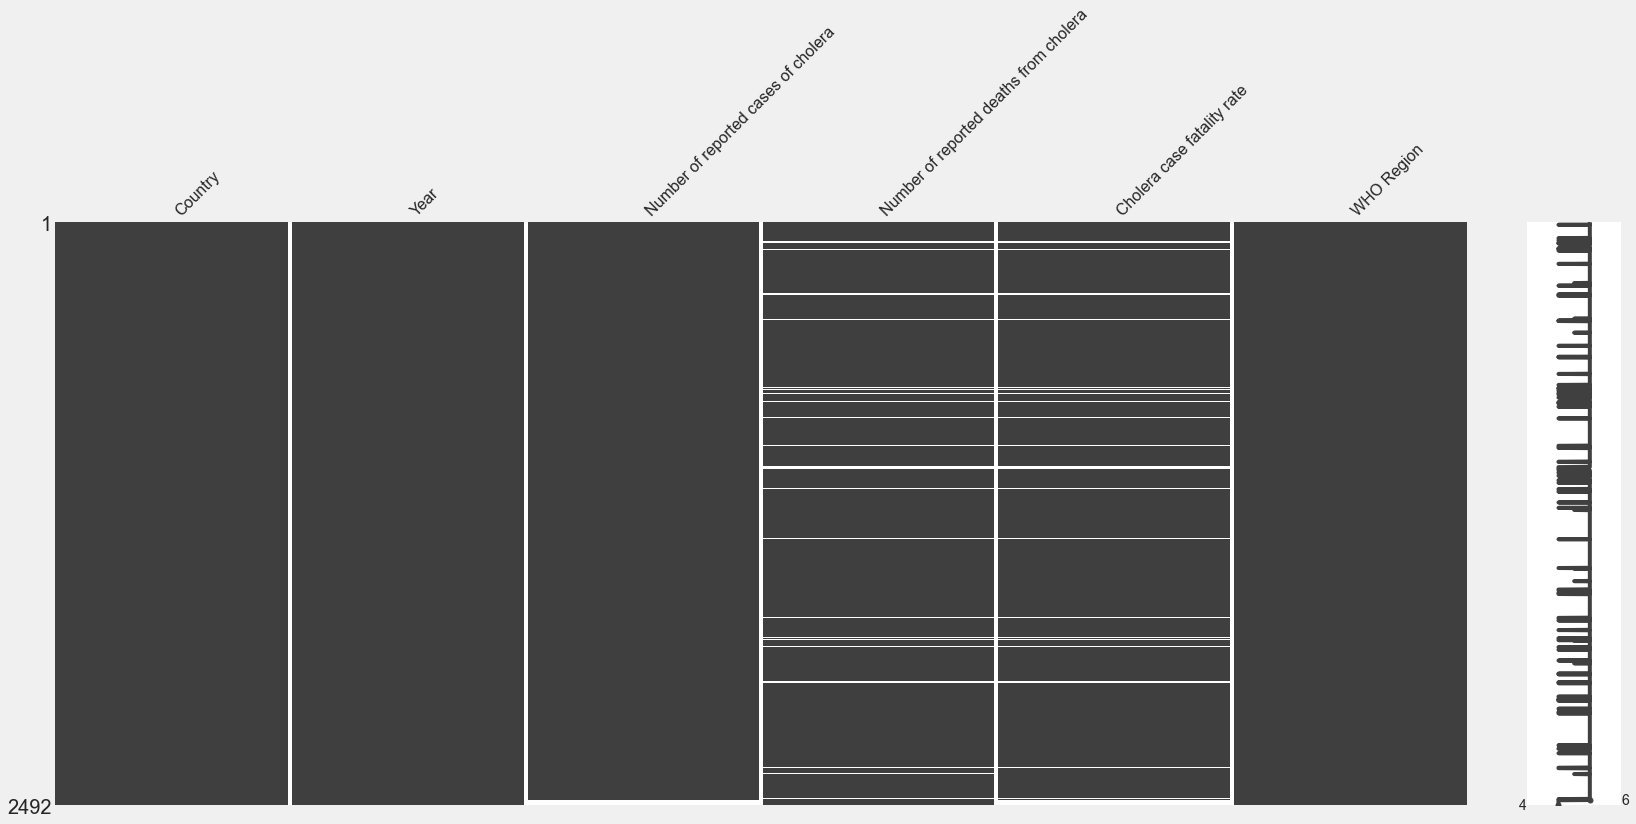

In [10]:
# visualize missing values
import missingno as msno
msno.matrix(dataset);

# Replacing the missing value

In [11]:
# replace missing values in numeric columns with 0

dataset.replace(np.nan, '0', regex = True, inplace = True)
dataset.isnull().sum()

Country                                   0
Year                                      0
Number of reported cases of cholera       0
Number of reported deaths from cholera    0
Cholera case fatality rate                0
WHO Region                                0
dtype: int64

In [12]:
# there are Unknown in cells which are creating problem
dataset.replace('Unknown', '0', regex = True, inplace = True)

In [13]:
dataset['Number of reported cases of cholera'] = dataset['Number of reported cases of cholera'].str.replace('3 5','0')
dataset['Number of reported deaths from cholera'] = dataset['Number of reported deaths from cholera'].str.replace('0 0','0')
dataset['Cholera case fatality rate'] = dataset['Cholera case fatality rate'].str.replace('0.0 0.0','0')

In [14]:
# correct data types
dataset.Country = dataset.Country.astype("string")
dataset['Year'] = dataset['Year'].astype("int")
dataset['Number of reported cases of cholera'] = dataset['Number of reported cases of cholera'].astype("int64")
dataset['Number of reported deaths from cholera'] = dataset['Number of reported deaths from cholera'].astype("int64")
dataset['Cholera case fatality rate'] = dataset['Cholera case fatality rate'].astype("float")
dataset['WHO Region'] = dataset['WHO Region'].astype("string")

# statistical descriptive

In [15]:
dataset.describe()

,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate
count,2492.000000,2492.000000,2492.000000,2492.000000
mean,1992.343098,3684.060193,360.033708,5.459960
std,14.834151,14840.198322,3484.892806,15.211705
min,1949.000000,0.000000,0.000000,0.000000
25%,1981.000000,8.750000,0.000000,0.000000
50%,1994.000000,228.500000,5.000000,1.300000
75%,2004.000000,1847.750000,53.250000,4.912500
max,2016.000000,340311.000000,124227.000000,450.000000


In [16]:
dataset.Country.value_counts()

India                         64
Malaysia                      49
Viet Nam                      47
Iran (Islamic Republic of)    45
Myanmar                       45
                              ..
Azerbaijan                     1
Armenia                        1
Georgia                        1
Suriname                       1
Andorra                        1
Name: Country, Length: 162, dtype: Int64

In [17]:
dataset.Country.nunique()

162

# EDA

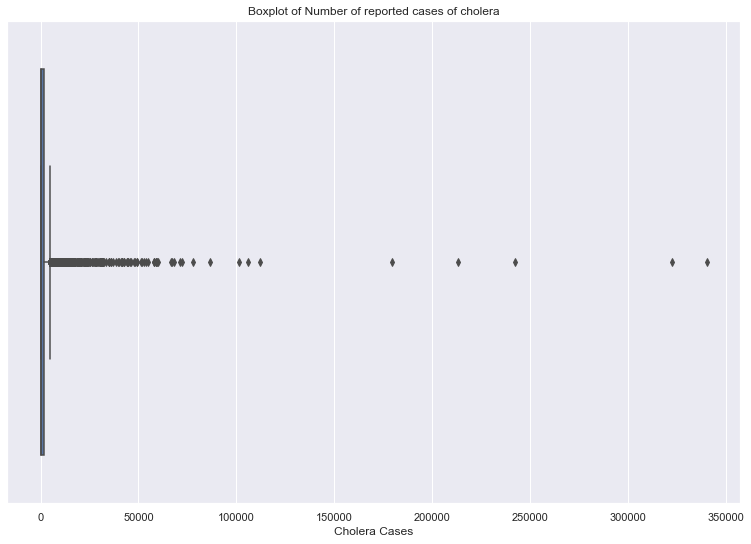

In [26]:
sns.boxplot('Number of reported cases of cholera',data = dataset)
plt.title("Boxplot of Number of reported cases of cholera")
plt.xlabel("Cholera Cases");

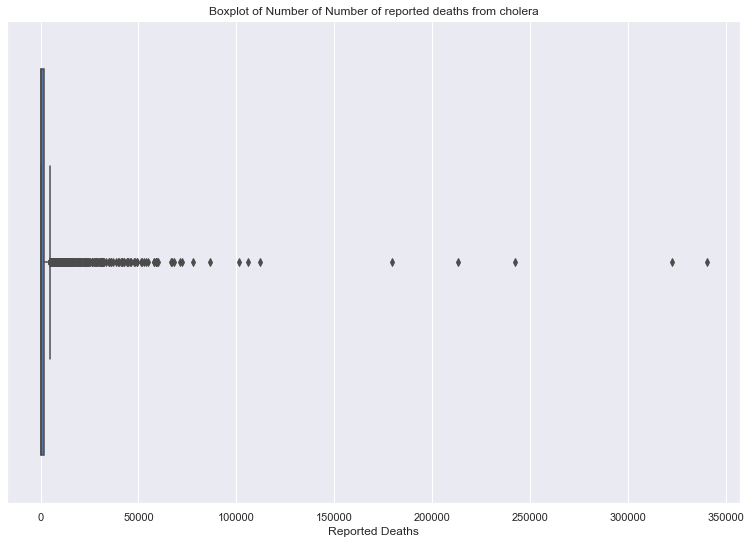

In [27]:
sns.boxplot('Number of reported cases of cholera',data = dataset)
plt.title("Boxplot of Number of Number of reported deaths from cholera")
plt.xlabel("Reported Deaths");

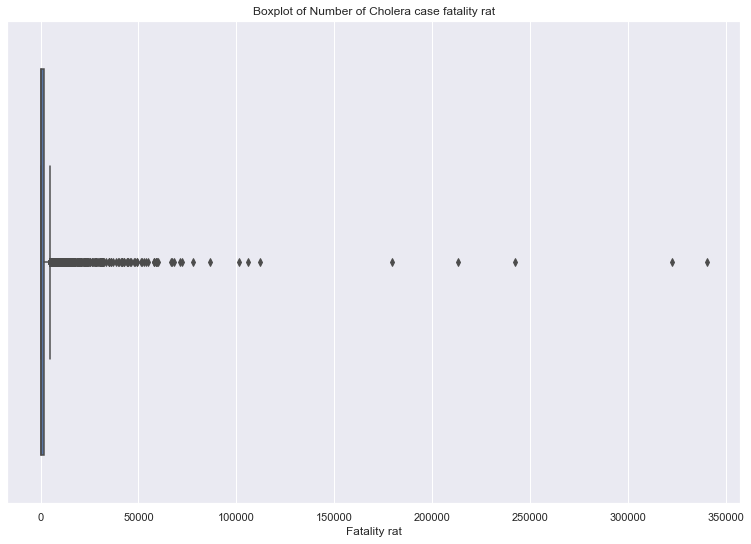

In [33]:
sns.boxplot('Number of reported cases of cholera',data = dataset)
plt.title("Boxplot of Number of Cholera case fatality rat")
plt.xlabel("Fatality rat");

In [34]:
# subset data for 2016
df_16 = dataset[dataset.Year == 2016]

In [49]:
# calculate correlaiton
corr = dataset.drop(["Country","WHO Region"], axis = 1).corr()

In [50]:
dataset.corr()

,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate
Year,1.000000,-0.011789,-0.184387,-0.342870
Number of reported cases of cholera,-0.011789,1.000000,0.442026,0.069941
Number of reported deaths from cholera,-0.184387,0.442026,1.000000,0.258984
Cholera case fatality rate,-0.342870,0.069941,0.258984,1.000000


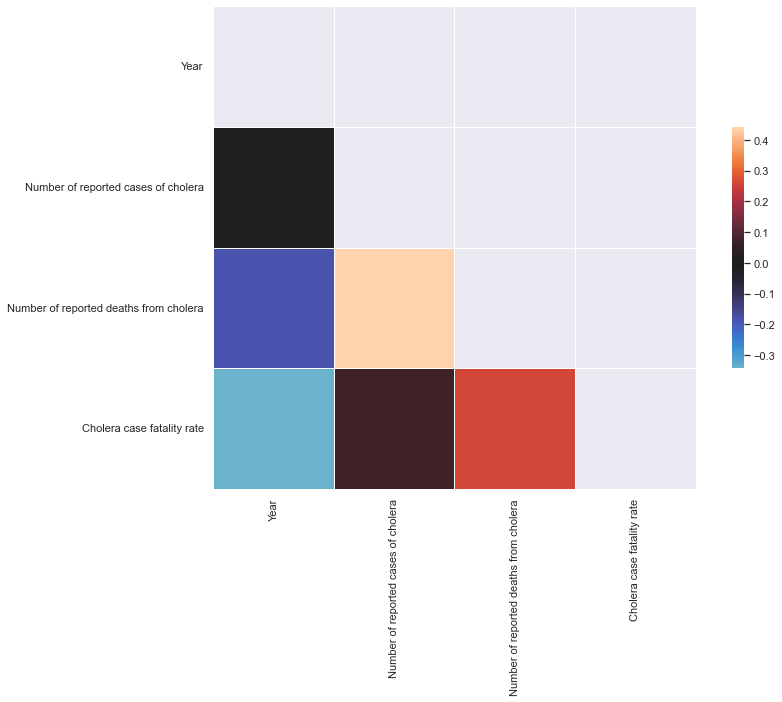

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,center=0,mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5});


In [52]:
# We'll subset data for last 10 years
df_last_ten = dataset[(dataset.Year <= 2016) & (dataset.Year >= 2007)]

In [53]:
# count number of cases in last 10 years for each contry
total_ten = df_last_ten.groupby('Country')['Number of reported cases of cholera'].sum()

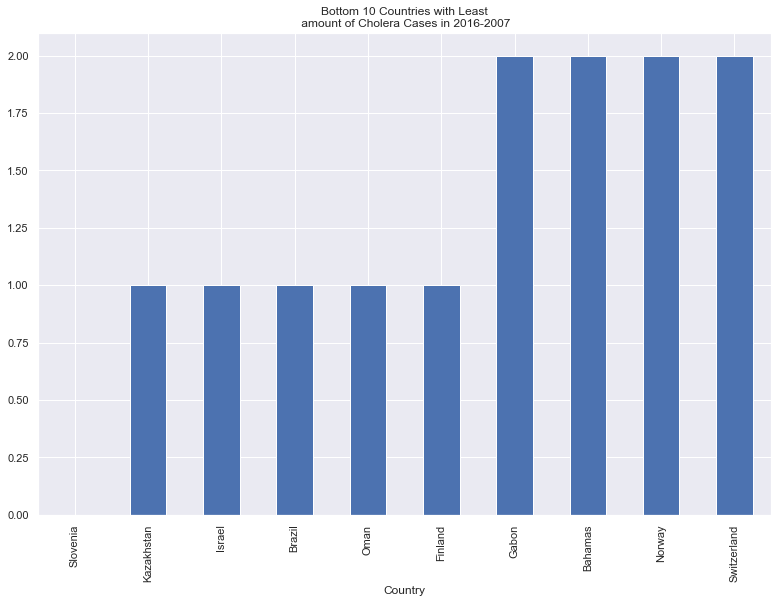

In [54]:
total_ten.sort_values()[0:10].plot(kind= 'bar')
plt.title("Bottom 10 Countries with Least\n amount of Cholera Cases in 2016-2007");

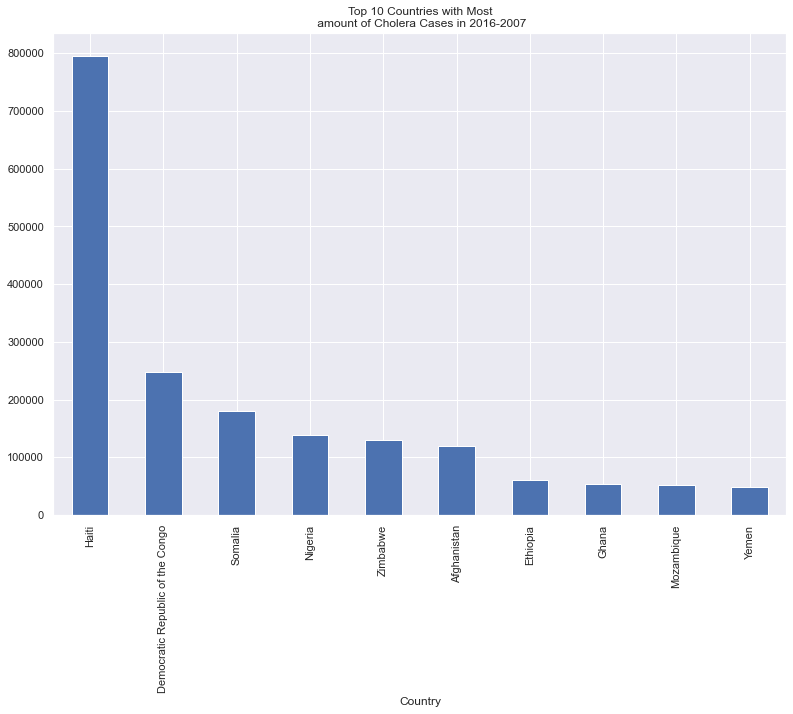

In [55]:
total_ten.sort_values(ascending=False)[0:10].plot(kind= 'bar')
plt.title("Top 10 Countries with Most\n amount of Cholera Cases in 2016-2007");

In [56]:
# subset data for 2016
df_16 = dataset[dataset.Year == 2016]

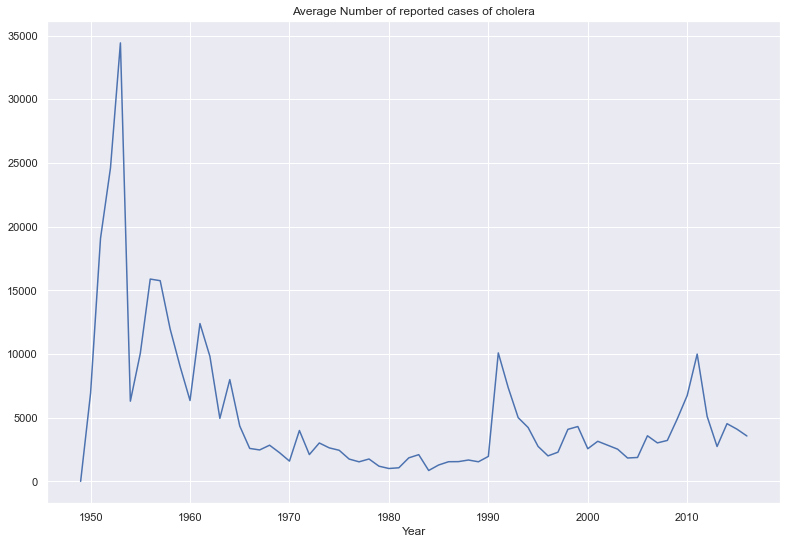

In [57]:
dataset.groupby('Year')['Number of reported cases of cholera'].mean().plot()
plt.title("Average Number of reported cases of cholera");

In [58]:
# subset data for 2016
df_16 = dataset[dataset.Year == 2016]

In [59]:
# we'll exclude the countries with fatality rate 0
fig = px.sunburst(df_16[df_16['Cholera case fatality rate']!=0], path=['WHO Region', 'Country'], \
                  color = 'Cholera case fatality rate',
                  values='Number of reported deaths from cholera',hover_data=['Cholera case fatality rate'])
fig.show()